# A1)
First, we implement our two different *algorithms*.

In [1]:
import math

def alg1(p, q):
    x1 = -p - math.sqrt(p**2 + q)
    x2 = -p + math.sqrt(p**2 + q)
    return (x1, x2)

def alg2(p, q):
    x1 = -p - math.sqrt(p**2 + q)
    x2 = -q / x1
    return (x1, x2)

After that, we test them by iterating over the given powers of $ 10 $.

In [2]:
import numpy as np

pArr = 10 ** np.array([2, 4, 6, 7, 8], dtype='object') # we use dtype='object' to prevent a integer overflow
for p in pArr:
    a1 = str(alg1(p, 1))
    a2 = str(alg2(p, 1))
    print(f"p={p} :: a1={a1}, a2={a2}")

p=100 :: a1=(-200.00499987500626, 0.004999875006248544), a2=(-200.00499987500626, 0.004999875006249609)
p=10000 :: a1=(-20000.000050000002, 5.000000055588316e-05), a2=(-20000.000050000002, 4.9999999874999996e-05)
p=1000000 :: a1=(-2000000.0000005001, 5.00003807246685e-07), a2=(-2000000.0000005001, 4.999999999998749e-07)
p=10000000 :: a1=(-20000000.000000052, 5.029141902923584e-08), a2=(-20000000.000000052, 4.999999999999987e-08)
p=100000000 :: a1=(-200000000.0, 0.0), a2=(-200000000.0, 5e-09)


We can deduce that $ alg2 $ is more precise than $ alg1 $ for large $ p $.

# A2)
The first step is two implement three functions: The two given and a reference function to compare the results to.
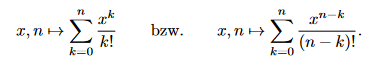

In [3]:
import math

def exp_one(x):
    ret = 0
    for k in range(x[1]+1):
        ret+=(x[0]**k)/math.factorial(k)
    return ret

def exp_two(x):
    ret = 0
    for k in range(x[1]+1):
        ret+=(x[0]**(x[1]-k))/math.factorial(x[1]-k)
    return ret

def exp_reference(x):
    return np.exp(x[0])

The functions expect tuples, the first element being $ x $ and the second one being $ n $.

In [4]:
exp_values=[[2,100],[5,100],[100,100],[2,1000],[5,1000],[100,1000]]
for value in exp_values:
    ref = exp_reference(value)
    res1 = exp_one(value)
    res2 = exp_two(value)
    print(f"{str(value)} :: reference={ref}, exp_one={res1}, exp_two={res2}")

[2, 100] :: reference=7.38905609893065, exp_one=7.389056098930649, exp_two=7.38905609893065
[5, 100] :: reference=148.4131591025766, exp_one=148.41315910257657, exp_two=148.41315910257663
[100, 100] :: reference=2.6881171418161356e+43, exp_one=1.41546087210088e+43, exp_two=1.4154608721008796e+43
[2, 1000] :: reference=7.38905609893065, exp_one=7.389056098930649, exp_two=7.38905609893065
[5, 1000] :: reference=148.4131591025766, exp_one=148.41315910257657, exp_two=148.41315910257663
[100, 1000] :: reference=2.6881171418161356e+43, exp_one=2.6881171418161356e+43, exp_two=2.688117141816134e+43


# A3)

We start by defining our two functions used in the integrals to be approximated.

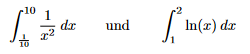

In [5]:
import numpy as np

def f1(x):
    return 1/x**2

def f2(x):
    return np.log(x)

Next, we define our functions for the different approximation methods. The parameter "a" is the lower integration bound and "b" the upper one.

**approxSum**

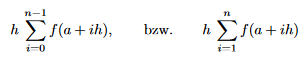


**approxTrazepoid**

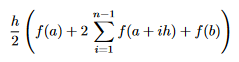

In [6]:
def approxSum(f, n, a, b):
    h = (b - a) / n
    result = 0
    for i in range(1, n):
        result += f(a + i * h)
    return result * h
    
def approxTrapezoid(f, n, a, b):
    h = (b - a) / n
    s = 0
    for i in range(1, n - 1):
        s += f(a + i * h)
    return h / 2 * (f(a) + 2*s + f(b))

Some tests for different n...

We start with $ f1 $.

In [7]:
for n in range(100, 1001, 100):
    resApproxSum = approxSum(f1, n, 1/10, 10)
    resApproxTrapezoid = approxTrapezoid(f1, n, 1/10, 10)
    print(f"n = {n} :: approxSum = {resApproxSum}, approxTrapezoid = {resApproxTrapezoid}")
    

n = 100 :: approxSum = 6.3730099957470925, approxTrapezoid = 11.322495098766888
n = 200 :: approxSum = 7.8158074787127365, approxTrapezoid = 10.290555041584879
n = 300 :: approxSum = 8.427651065744415, approxTrapezoid = 10.077483876915682
n = 400 :: approxSum = 8.76326970324692, approxTrapezoid = 10.000644723558587
n = 500 :: approxSum = 8.974742238065348, approxTrapezoid = 9.964642451650468
n = 600 :: approxSum = 9.12005001960404, approxTrapezoid = 9.94496697375343
n = 700 :: approxSum = 9.225991623649676, approxTrapezoid = 9.933063365615741
n = 800 :: approxSum = 9.306634200857351, approxTrapezoid = 9.925322019006627
n = 900 :: approxSum = 9.370063258010589, approxTrapezoid = 9.920008015610701
n = 1000 :: approxSum = 9.421253684950496, approxTrapezoid = 9.91620398863902


And here goes $ f2 $.

In [8]:
for n in range(100, 1001, 100):
    resApproxSum = approxSum(f2, n, 1, 2)
    resApproxTrapezoid = approxTrapezoid(f2, n, 1, 2)
    print(f"n = {n} :: approxSum = {resApproxSum}, approxTrapezoid = {resApproxTrapezoid}")

n = 100 :: approxSum = 0.38282445857472897, approxTrapezoid = 0.3794088480901647
n = 200 :: approxSum = 0.3845604515033433, approxTrapezoid = 0.38284009920303397
n = 300 :: approxSum = 0.38513865285629445, approxTrapezoid = 0.3839889677456969
n = 400 :: approxSum = 0.3854276667276191, approxTrapezoid = 0.3845643597066733
n = 500 :: approxSum = 0.385601047272703, approxTrapezoid = 0.38490990109281026
n = 600 :: approxSum = 0.3857166227287023, approxTrapezoid = 0.38514038954614993
n = 700 :: approxSum = 0.38579917095691585, approxTrapezoid = 0.3853050866007128
n = 800 :: approxSum = 0.38586107902788014, approxTrapezoid = 0.3854286435342726
n = 900 :: approxSum = 0.38590922791258736, approxTrapezoid = 0.38552476360109156
n = 1000 :: approxSum = 0.3859477458629464, approxTrapezoid = 0.38560167239770804


# A4
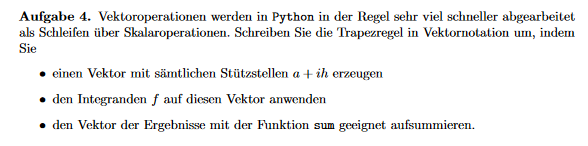

In [9]:
import numpy as np

def approxTrapezoidVec(f, n, a, b):
    h = (b - a) / n
    vf1 = np.vectorize(f1)
    x = np.linspace(a, b, n + 1)
    s = np.sum(vf1(x))
    return h / 2 * (f(a) + 2*s + f(b))

Some tests...

In [10]:
for n in range(100, 1001, 100):
    resApproxTrapezoidVec = approxTrapezoid(f1, n, 1/10, 10)
    print(f"n = {n} :: approxTrapezoidVec = {resApproxTrapezoidVec}")

n = 100 :: approxTrapezoidVec = 11.322495098766888
n = 200 :: approxTrapezoidVec = 10.290555041584879
n = 300 :: approxTrapezoidVec = 10.077483876915682
n = 400 :: approxTrapezoidVec = 10.000644723558587
n = 500 :: approxTrapezoidVec = 9.964642451650468
n = 600 :: approxTrapezoidVec = 9.94496697375343
n = 700 :: approxTrapezoidVec = 9.933063365615741
n = 800 :: approxTrapezoidVec = 9.925322019006627
n = 900 :: approxTrapezoidVec = 9.920008015610701
n = 1000 :: approxTrapezoidVec = 9.91620398863902


# A5
Um nur unter Verwendung der 4 Grundrechenarten die Wurzel einer positiven
reellen Zahl naeherungsweise zu berechnen gibt es viele verschiedene Ansaetze.
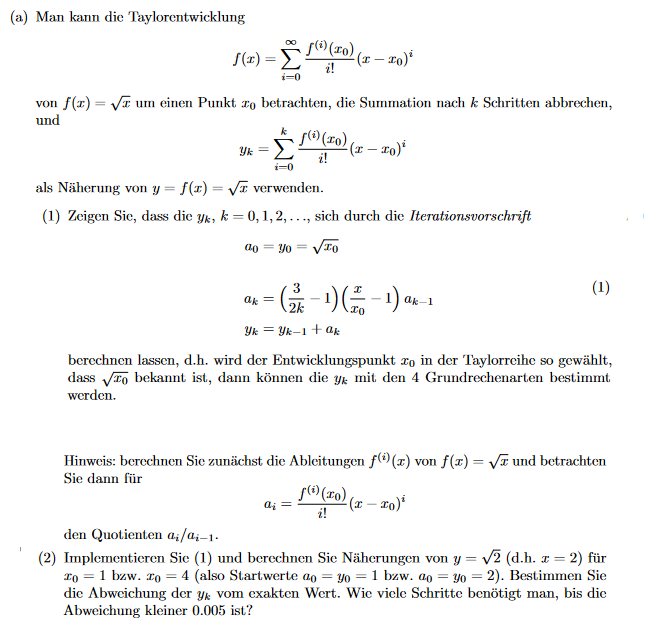

$ f(x) = \sqrt{x} $

$ f^{(1)}(x) = \frac{1}{2x^\frac{1}{2}} $

$ f^{(2)}(x) = -\frac{1}{4x^\frac{3}{2}} $

$ f^{(3)}(x) = \frac{3}{8x^\frac{5}{2}} $

Thus we can trivially conclude that the $ nth $ derivative of $ f(x) = \sqrt{x} $ can be expressed as:

In [11]:
import numpy as np

def sqrtDerivative(n, x):
    return (-1)**(n-1) * (np.math.factorial(np.math.factorial(2*n - 3))/2**n) * x**(1/2 - n)